In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from scipy import stats

In [2]:
df = pd.read_csv('QVI_complete_data.csv')

In [3]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
df['DATE'] = pd.to_datetime(df['DATE'])
df['MONTH'] = df['DATE'].dt.to_period('M')
df.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND_NAME,LIFESTAGE,MEMBER_TYPE,MONTH
0,88140,2018-07-01,88,86914,25,Pringles SourCream Onion 134g,2,7.4,134.0,Pringles,MIDAGE SINGLES/COUPLES,Mainstream,2018-07
1,60276,2018-07-01,60,57330,3,Kettle Sensations Camembert & Fig 150g,2,9.2,150.0,Kettle,RETIREES,Mainstream,2018-07
2,199014,2018-07-01,199,197623,104,Infuzions Thai SweetChili PotatoMix 110g,2,7.6,110.0,Infuzions,RETIREES,Premium,2018-07
3,35052,2018-07-01,35,31630,11,RRD Pc Sea Salt 165g,1,3.0,165.0,Red Rock Deli,YOUNG SINGLES/COUPLES,Budget,2018-07
4,72104,2018-07-01,72,71038,20,Doritos Cheese Supreme 330g,2,11.4,330.0,Doritos,OLDER SINGLES/COUPLES,Mainstream,2018-07


In [5]:
# Grouping by STORE_NBR and MONTH
chips_grp_before = df.groupby(["STORE_NBR", "MONTH"])
total_grp = chips_grp_before["TOT_SALES"].sum()
total_grp

STORE_NBR  MONTH  
1          2018-07    188.9
           2018-08    168.4
           2018-09    268.1
           2018-10    175.4
           2018-11    184.8
                      ...  
272        2019-02    385.3
           2019-03    421.9
           2019-04    445.1
           2019-05    314.6
           2019-06    301.9
Name: TOT_SALES, Length: 3165, dtype: float64

In [6]:
# TOT_SALES by STORE_NBR
chips_grp_sales = df.groupby("STORE_NBR")
total_sales = chips_grp_sales["TOT_SALES"].sum()
total_sales

STORE_NBR
1       2223.90
2       1854.00
3      12149.65
4      13709.25
5       8802.20
         ...   
268     2421.85
269    10470.70
270    10519.05
271     8952.30
272     4398.95
Name: TOT_SALES, Length: 271, dtype: float64

In [7]:
# TOT_SALES in Trial Stores
trial_store = total_sales[76:88]
trial_store

STORE_NBR
77     2839.20
78     8738.05
79    11096.80
80    10854.20
81    13479.65
82     3906.80
83     9261.50
84     5069.90
85       10.90
86    10010.75
87     3731.50
88    15445.85
Name: TOT_SALES, dtype: float64

In [8]:
# Sorting stores by total sales to find a match for Store 77.
total_sorted = total_sales.sort_values(ascending=True)
total_sorted.iloc[57:75]

STORE_NBR
195    2408.05
268    2421.85
6      2458.90
163    2467.10
214    2518.10
176    2528.10
53     2531.05
233    2589.10
255    2610.60
185    2661.80
46     2734.75
187    2777.10
220    2796.90
205    2807.00
188    2823.40
77     2839.20
141    2857.10
50     2859.90
Name: TOT_SALES, dtype: float64

In [9]:
stores_control_one = [195, 268, 6, 163, 214, 176, 53, 233, 255, 185, 46, 187, 220, 205, 188, 77, 141, 50]
control_one = pd.DataFrame({"Value" : total_grp[stores_control_one]})
print(control_one)

                    Value
STORE_NBR MONTH          
195       2018-07  222.20
          2018-08  303.15
          2018-09  132.50
          2018-10  249.40
          2018-11  212.90
...                   ...
50        2019-02  149.10
          2019-03  227.00
          2019-04  217.40
          2019-05  219.50
          2019-06  258.00

[216 rows x 1 columns]


In [10]:
# Organizing the stores in a pivot chart format.
pivot_chips1 = control_one.pivot_table(index="MONTH", columns="STORE_NBR", values="Value")
pivot_chips1

STORE_NBR,6,46,50,53,77,141,163,176,185,187,188,195,205,214,220,233,255,268
MONTH,,,,,,,,,,,,,,,,,,
2018-07,241.9,203.60,306.6,204.10,268.4,262.6,180.9,267.6,200.7,238.6,216.0,222.20,295.0,166.9,227.2,271.2,207.6,213.50
2018-08,177.6,232.50,282.1,234.60,247.5,215.1,172.9,139.3,253.3,214.3,204.6,303.15,260.5,191.8,236.5,260.7,163.5,291.95
2018-09,192.2,217.60,253.6,168.00,216.8,207.3,256.3,178.4,181.3,260.8,247.2,132.50,215.5,205.5,210.0,220.9,214.3,158.90
2018-10,268.9,262.50,229.2,208.00,194.3,260.9,165.7,222.6,203.3,171.2,203.7,249.40,274.7,168.9,265.2,159.3,219.3,229.90
2018-11,244.7,241.90,212.5,203.30,224.9,239.2,245.6,161.3,182.7,327.9,213.3,212.90,210.8,177.7,280.4,206.5,227.6,202.90
2018-12,198.7,290.10,309.9,294.80,255.2,320.7,210.7,216.2,193.3,228.7,261.5,245.20,216.5,259.1,222.3,265.4,244.0,189.20
2019-01,170.7,160.60,195.0,150.40,188.4,330.1,195.7,163.9,242.2,184.2,163.7,145.30,227.3,220.7,211.7,150.5,214.4,150.60
2019-02,210.6,191.40,149.1,179.10,211.6,216.1,172.7,233.3,204.3,241.4,250.7,167.20,148.6,192.0,184.6,220.7,196.8,154.80
2019-03,176.9,243.70,227.0,225.80,255.1,241.7,235.1,233.2,242.6,242.1,304.0,178.50,319.2,279.4,259.6,180.6,198.8,212.20


<Figure size 4500x1500 with 0 Axes>

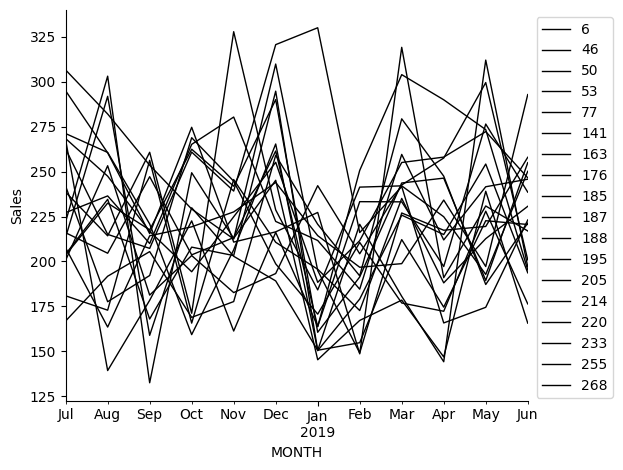

In [11]:
plt.figure(figsize=[15,5], dpi=300)
pivot_chips1.plot(color="black", linestyle="-", linewidth=1)
plt.legend(loc="upper right", bbox_to_anchor=(1.20, 1))
plt.ylabel("Sales")
plt.tight_layout()
sns.despine()
plt.show()

That line chart looks unappealing. Let's examine the correlations more closely and rechart using just the two stores for comparison.

In [12]:
pivot_chips1.corr('pearson')

STORE_NBR,6,46,50,53,77,141,163,176,185,187,188,195,205,214,220,233,255,268
STORE_NBR,,,,,,,,,,,,,,,,,,
6,1.000000,0.065304,0.003394,0.102143,-0.126601,0.046228,-0.202844,0.344615,-0.284958,0.034404,-0.143050,0.420294,0.158280,-0.723166,0.420012,0.244767,-0.098463,0.167139
46,0.065304,1.000000,0.482986,0.585408,0.241070,0.045911,0.148415,-0.038078,-0.353622,0.206526,0.249197,0.305979,0.138765,0.348185,0.435003,-0.096911,0.447482,0.331117
50,0.003394,0.482986,1.000000,0.512003,0.517770,0.241407,0.070119,0.053213,-0.199083,0.015255,-0.066691,0.471623,0.484369,0.061027,0.185897,0.449308,0.138385,0.476786
53,0.102143,0.585408,0.512003,1.000000,0.665977,-0.006638,-0.049423,0.263983,0.262157,-0.104197,0.484290,0.659934,0.198580,0.286008,0.261685,0.542166,-0.035123,0.466685
77,-0.126601,0.241070,0.517770,0.665977,1.000000,-0.386495,0.118018,0.465419,0.381007,0.134022,0.555236,0.287692,0.249265,0.251305,0.106183,0.579391,0.016946,0.396128
141,0.046228,0.045911,0.241407,-0.006638,-0.386495,1.000000,-0.087805,-0.152583,-0.380477,-0.163280,-0.476007,0.089436,0.233519,0.137612,0.024444,-0.133808,0.136766,-0.187669
163,-0.202844,0.148415,0.070119,-0.049423,0.118018,-0.087805,1.000000,-0.091594,-0.253169,0.637723,0.217734,-0.404972,-0.016321,0.324821,0.297872,0.025933,0.365816,-0.228274
176,0.344615,-0.038078,0.053213,0.263983,0.465419,-0.152583,-0.091594,1.000000,0.148942,-0.209123,0.370900,-0.002184,0.176430,-0.038396,-0.011312,0.356160,0.190737,-0.017926
185,-0.284958,-0.353622,-0.199083,0.262157,0.381007,-0.380477,-0.253169,0.148942,1.000000,-0.546756,0.300221,0.174034,0.141355,0.166916,-0.033300,0.149928,-0.408657,0.273039


Store 53 and Store 77 have the strongest correlation at 0.665977.

<Figure size 4500x1500 with 0 Axes>

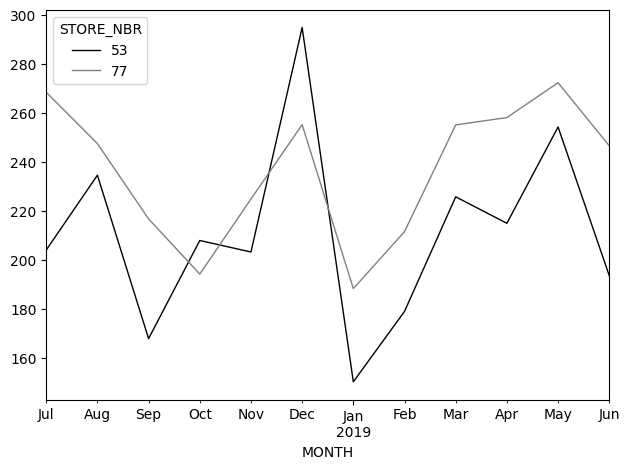

In [13]:
plt.figure(figsize=[15,5], dpi=300)
chips1_graph = pivot_chips1[[53, 77]]
chips1_graph.plot(color=["black", "grey"], linestyle="-", linewidth=1)
plt.tight_layout()
plt.show()

# 86

In [14]:
total_sorted.iloc[178:201]

STORE_NBR
30      9679.60
232     9710.30
116     9724.70
172     9728.20
221     9734.00
227     9757.90
109     9758.10
105     9759.70
225     9761.80
236     9770.10
57      9780.80
62      9782.30
102     9789.00
113     9848.70
164     9889.50
13      9890.80
106     9944.10
247     9977.50
155    10004.55
138    10007.80
86     10010.75
55     10063.05
180    10087.80
Name: TOT_SALES, dtype: float64

In [15]:
stores_control_two = [30, 232, 116, 172, 221, 227, 109, 105, 225, 236, 57, 62, 102, 113, 164, 13, 106, 247, 155, 138, 86, 55, 180]
control_two = pd.DataFrame({"Value" : total_grp[stores_control_two]})
print(control_two)

                   Value
STORE_NBR MONTH         
30        2018-07  827.8
          2018-08  873.9
          2018-09  793.0
          2018-10  798.0
          2018-11  779.8
...                  ...
180       2019-02  816.2
          2019-03  899.2
          2019-04  889.4
          2019-05  831.8
          2019-06  866.8

[276 rows x 1 columns]


In [16]:
pivot_chips2 = control_two.pivot_table(index="MONTH", columns="STORE_NBR", values="Value")
pivot_chips2

STORE_NBR,13,30,55,57,62,86,102,105,106,109,...,155,164,172,180,221,225,227,232,236,247
MONTH,,,,,,,,,,,,,,,,,,,,,
2018-07,754.6,827.8,826.60,768.8,952.8,851.00,746.4,859.5,979.80,820.4,...,900.60,770.0,738.4,764.2,915.5,794.8,839.4,947.9,885.4,804.0
2018-08,709.1,873.9,852.30,873.9,745.6,726.85,923.2,860.8,746.55,801.3,...,738.70,859.7,708.2,721.4,880.7,788.6,810.8,687.2,906.0,738.3
2018-09,794.8,793.0,1003.20,742.4,876.4,855.00,898.4,792.0,1027.40,769.4,...,939.60,752.4,767.2,820.4,686.8,879.0,716.4,885.4,800.8,781.6
2018-10,773.6,798.0,959.60,870.2,764.0,898.80,795.8,806.6,871.80,868.8,...,914.00,788.2,931.4,793.4,825.2,793.8,954.4,853.2,781.2,899.4
2018-11,960.0,779.8,705.40,779.6,856.4,851.20,847.2,711.2,903.20,884.6,...,835.00,729.8,811.4,748.8,879.2,770.6,826.8,892.0,647.8,748.6
2018-12,841.6,918.8,745.20,896.8,821.8,812.20,763.8,962.6,788.60,835.2,...,799.80,981.4,850.2,932.0,873.5,778.0,772.6,937.6,875.2,747.0
2019-01,836.4,755.8,956.00,747.4,811.8,800.60,865.8,736.4,821.60,804.2,...,834.60,886.2,842.6,1004.2,846.1,746.8,900.6,745.8,798.4,874.0
2019-02,770.2,765.0,703.00,878.8,807.0,872.80,720.6,694.4,753.80,839.8,...,850.80,728.2,832.8,816.2,696.1,728.4,734.4,829.4,846.6,883.2
2019-03,959.2,896.4,885.40,762.4,855.6,945.40,771.8,861.6,877.60,990.8,...,767.00,926.0,663.4,899.2,810.9,802.2,930.6,763.2,829.0,859.4


<Figure size 4500x1500 with 0 Axes>

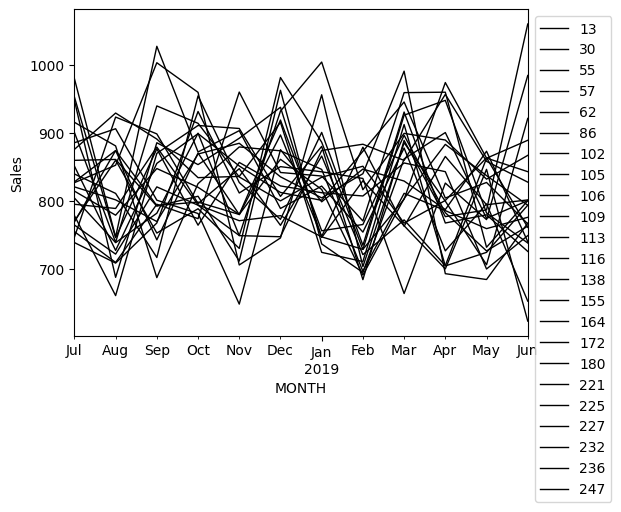

In [17]:
plt.figure(figsize=[15,5], dpi=300)
pivot_chips2.plot(color="black", linestyle="-", linewidth=1)
plt.legend(loc="upper right", bbox_to_anchor=(1.20, 1))
plt.ylabel("Sales")
plt.tight_layout()
plt.show()

That line chart looks unappealing. Let's examine the correlations more closely and rechart using just the two stores for comparison.

In [18]:
pivot_chips2.corr(method="pearson")

STORE_NBR,13,30,55,57,62,86,102,105,106,109,...,155,164,172,180,221,225,227,232,236,247
STORE_NBR,,,,,,,,,,,,,,,,,,,,,
13,1.000000,0.149570,-0.105840,-0.173756,0.394036,0.344343,-0.366950,0.111845,0.040670,0.346328,...,-0.265933,0.396902,-0.072666,0.360625,0.094237,0.233637,0.195566,-0.081799,-0.590898,0.205943
30,0.149570,1.000000,0.032997,0.282060,0.289112,0.097201,-0.176575,0.738355,0.124134,0.555122,...,-0.381579,0.607942,-0.422217,0.001758,0.474149,-0.198965,0.238783,0.168081,0.406211,-0.455815
55,-0.105840,0.032997,1.000000,-0.382601,0.079993,0.027283,0.396406,0.058351,0.265985,0.094942,...,0.185946,0.014118,0.148041,0.211951,-0.106083,0.125919,0.296790,-0.296377,-0.090221,0.103783
57,-0.173756,0.282060,-0.382601,1.000000,-0.374827,-0.242125,-0.375400,0.360576,-0.564344,-0.099756,...,-0.286276,0.286948,0.290192,-0.141773,0.051239,-0.036094,-0.154638,-0.073156,0.282986,0.089807
62,0.394036,0.289112,0.079993,-0.374827,1.000000,0.386168,-0.435721,0.164322,0.666554,0.333403,...,0.326270,0.049097,-0.356877,-0.025585,0.232878,-0.011441,0.074275,0.474721,-0.079968,-0.126143
86,0.344343,0.097201,0.027283,-0.242125,0.386168,1.000000,-0.476169,-0.162287,0.552869,0.625435,...,0.450795,-0.094943,-0.220946,0.025692,-0.204762,-0.161787,0.458059,0.475228,-0.136237,0.299957
102,-0.366950,-0.176575,0.396406,-0.375400,-0.435721,-0.476169,1.000000,-0.275216,0.025180,-0.179017,...,-0.092353,-0.308478,0.015669,-0.177731,-0.015182,-0.058978,-0.100007,-0.283223,-0.137528,-0.511822
105,0.111845,0.738355,0.058351,0.360576,0.164322,-0.162287,-0.275216,1.000000,-0.090229,-0.032851,...,-0.321811,0.740342,-0.177035,0.167947,0.380081,0.377429,0.022282,0.012122,0.453904,-0.123076
106,0.040670,0.124134,0.265985,-0.564344,0.666554,0.552869,0.025180,-0.090229,1.000000,0.320029,...,0.722353,-0.225123,-0.443902,-0.247818,0.086262,-0.092015,0.273004,0.712953,-0.038822,-0.269074


Store 109 and Store 86 have the strongest correlation at 0.625435.

<Figure size 4500x1500 with 0 Axes>

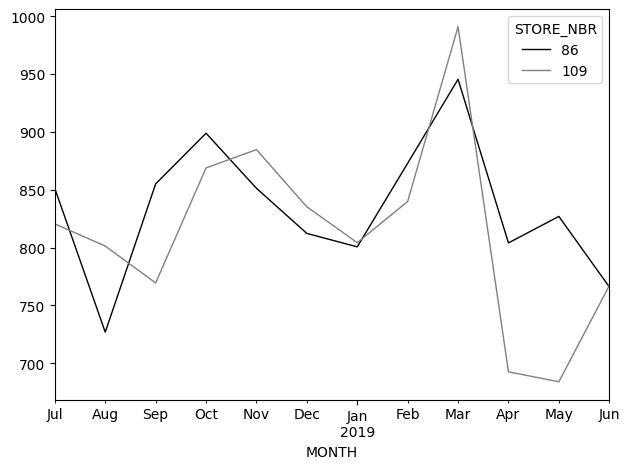

In [19]:
plt.figure(figsize=[15,5], dpi=300)
chips2_graph = pivot_chips2[[86, 109]]
chips2_graph.plot(color=["black", "grey"], linestyle="-", linewidth=1)
plt.tight_layout()
plt.show()

# 88

In [20]:
total_sorted.loc[[88, 206, 193, 159, 86, 229, 243, 201, 188, 61]]

STORE_NBR
88     15445.85
206        7.60
193       13.10
159      312.20
86     10010.75
229     9556.60
243     4313.40
201    13513.30
188     2823.40
61       516.50
Name: TOT_SALES, dtype: float64

The sales for Stores 243, 86, 188, 61, 159, 193, and 206 are too low to be considered.

<Figure size 4500x1500 with 0 Axes>

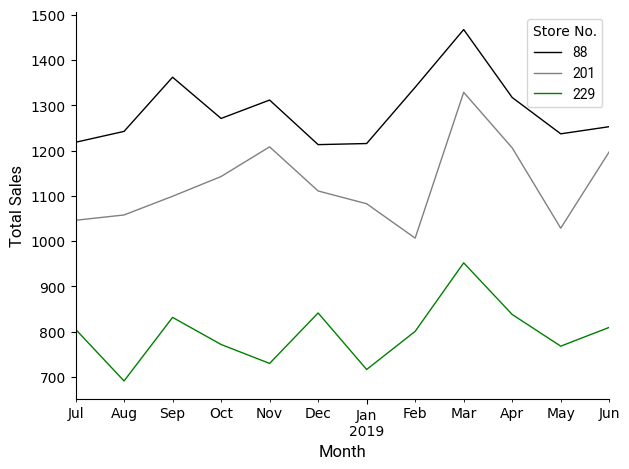

In [39]:
import matplotlib.font_manager as fm

font_path = r'C:\Users\Amiteshwar Singh\Desktop\Roboto-Regular.ttf'
prop = fm.FontProperties(fname=font_path)

three_amigos_88 = total_grp[[201, 88, 229]]
amigos_88_df = pd.DataFrame(three_amigos_88)

font_path = r'C:\Users\Amiteshwar Singh\Desktop\Roboto-Regular.ttf'
prop = fm.FontProperties(fname=font_path)

plt.figure(figsize=[15, 5], dpi=300)
amigos_88_pivot = amigos_88_df.pivot_table(index="MONTH", columns="STORE_NBR", values="TOT_SALES")
ax = amigos_88_pivot.plot(color=["black", "grey", "green"], linestyle="-", linewidth=1)


sns.despine()
plt.legend(title='Store No.', prop=prop)
plt.xlabel('Month', fontsize=12, fontproperties=prop)
plt.ylabel('Total Sales', fontsize=12, fontproperties=prop)
plt.tight_layout()
plt.savefig('pre-trial.png')
plt.show()

For trial Store 88, I will use Store 201 as the control store.

# Trial Store

In [22]:
trial_store_77 = df.loc[df["STORE_NBR"] == 77]
control_store_53 = df.loc[df["STORE_NBR"] == 53]

trial_store_86 = df.loc[df["STORE_NBR"] == 86]
control_store_109 = df.loc[df["STORE_NBR"] == 109]

trial_store_88 = df.loc[df["STORE_NBR"] == 88]
control_store_201 = df.loc[df["STORE_NBR"] == 201]

In [23]:
# 77 & 53
trial_store_77[["TOT_SALES", "PROD_QTY"]].sum()

TOT_SALES    2839.2
PROD_QTY      814.0
dtype: float64

In [24]:
control_store_53[["TOT_SALES", "PROD_QTY"]].sum()

TOT_SALES    2531.05
PROD_QTY      723.00
dtype: float64

In [25]:
trial_store_77["LYLTY_CARD_NBR"].value_counts()

LYLTY_CARD_NBR
77476      5
77109      4
77338      4
77344      4
77205      4
          ..
77235      1
77438      1
77032      1
77076      1
2330271    1
Name: count, Length: 349, dtype: int64

In [26]:
trial_store_77[["LYLTY_CARD_NBR"]].count()

LYLTY_CARD_NBR    529
dtype: int64

In [27]:
control_store_53["LYLTY_CARD_NBR"].value_counts()

LYLTY_CARD_NBR
53260    5
53087    5
53416    5
53333    4
53379    4
        ..
53434    1
53464    1
53233    1
53498    1
53290    1
Name: count, Length: 314, dtype: int64

In [28]:
control_store_53[["LYLTY_CARD_NBR"]].count()

LYLTY_CARD_NBR    492
dtype: int64

In [29]:
# COUNTING REPEAT CUSTOMERS THAT PURCHASED MORE THAN ONCE
repeat_customers = trial_store_77["LYLTY_CARD_NBR"].value_counts()
print(repeat_customers.head(24))

repeats_total = 24

LYLTY_CARD_NBR
77476      5
77109      4
77338      4
77344      4
77205      4
77449      3
77069      3
77206      3
77402      3
77049      3
77390      3
77280      3
77111      3
77258      3
77080      3
2330291    3
77066      3
77480      3
77077      3
77243      3
77000      3
77300      3
77163      3
77271      3
Name: count, dtype: int64


In [30]:
# COUNTING REPEAT CUSTOMERS THAT PURCHASED MORE THAN ONCE
repeat_customers2 = control_store_53["LYLTY_CARD_NBR"].value_counts()
print(repeat_customers2.head(9))


repeats_total_two = 9

LYLTY_CARD_NBR
53260    5
53087    5
53416    5
53333    4
53379    4
53497    4
53054    4
53019    4
53492    3
Name: count, dtype: int64


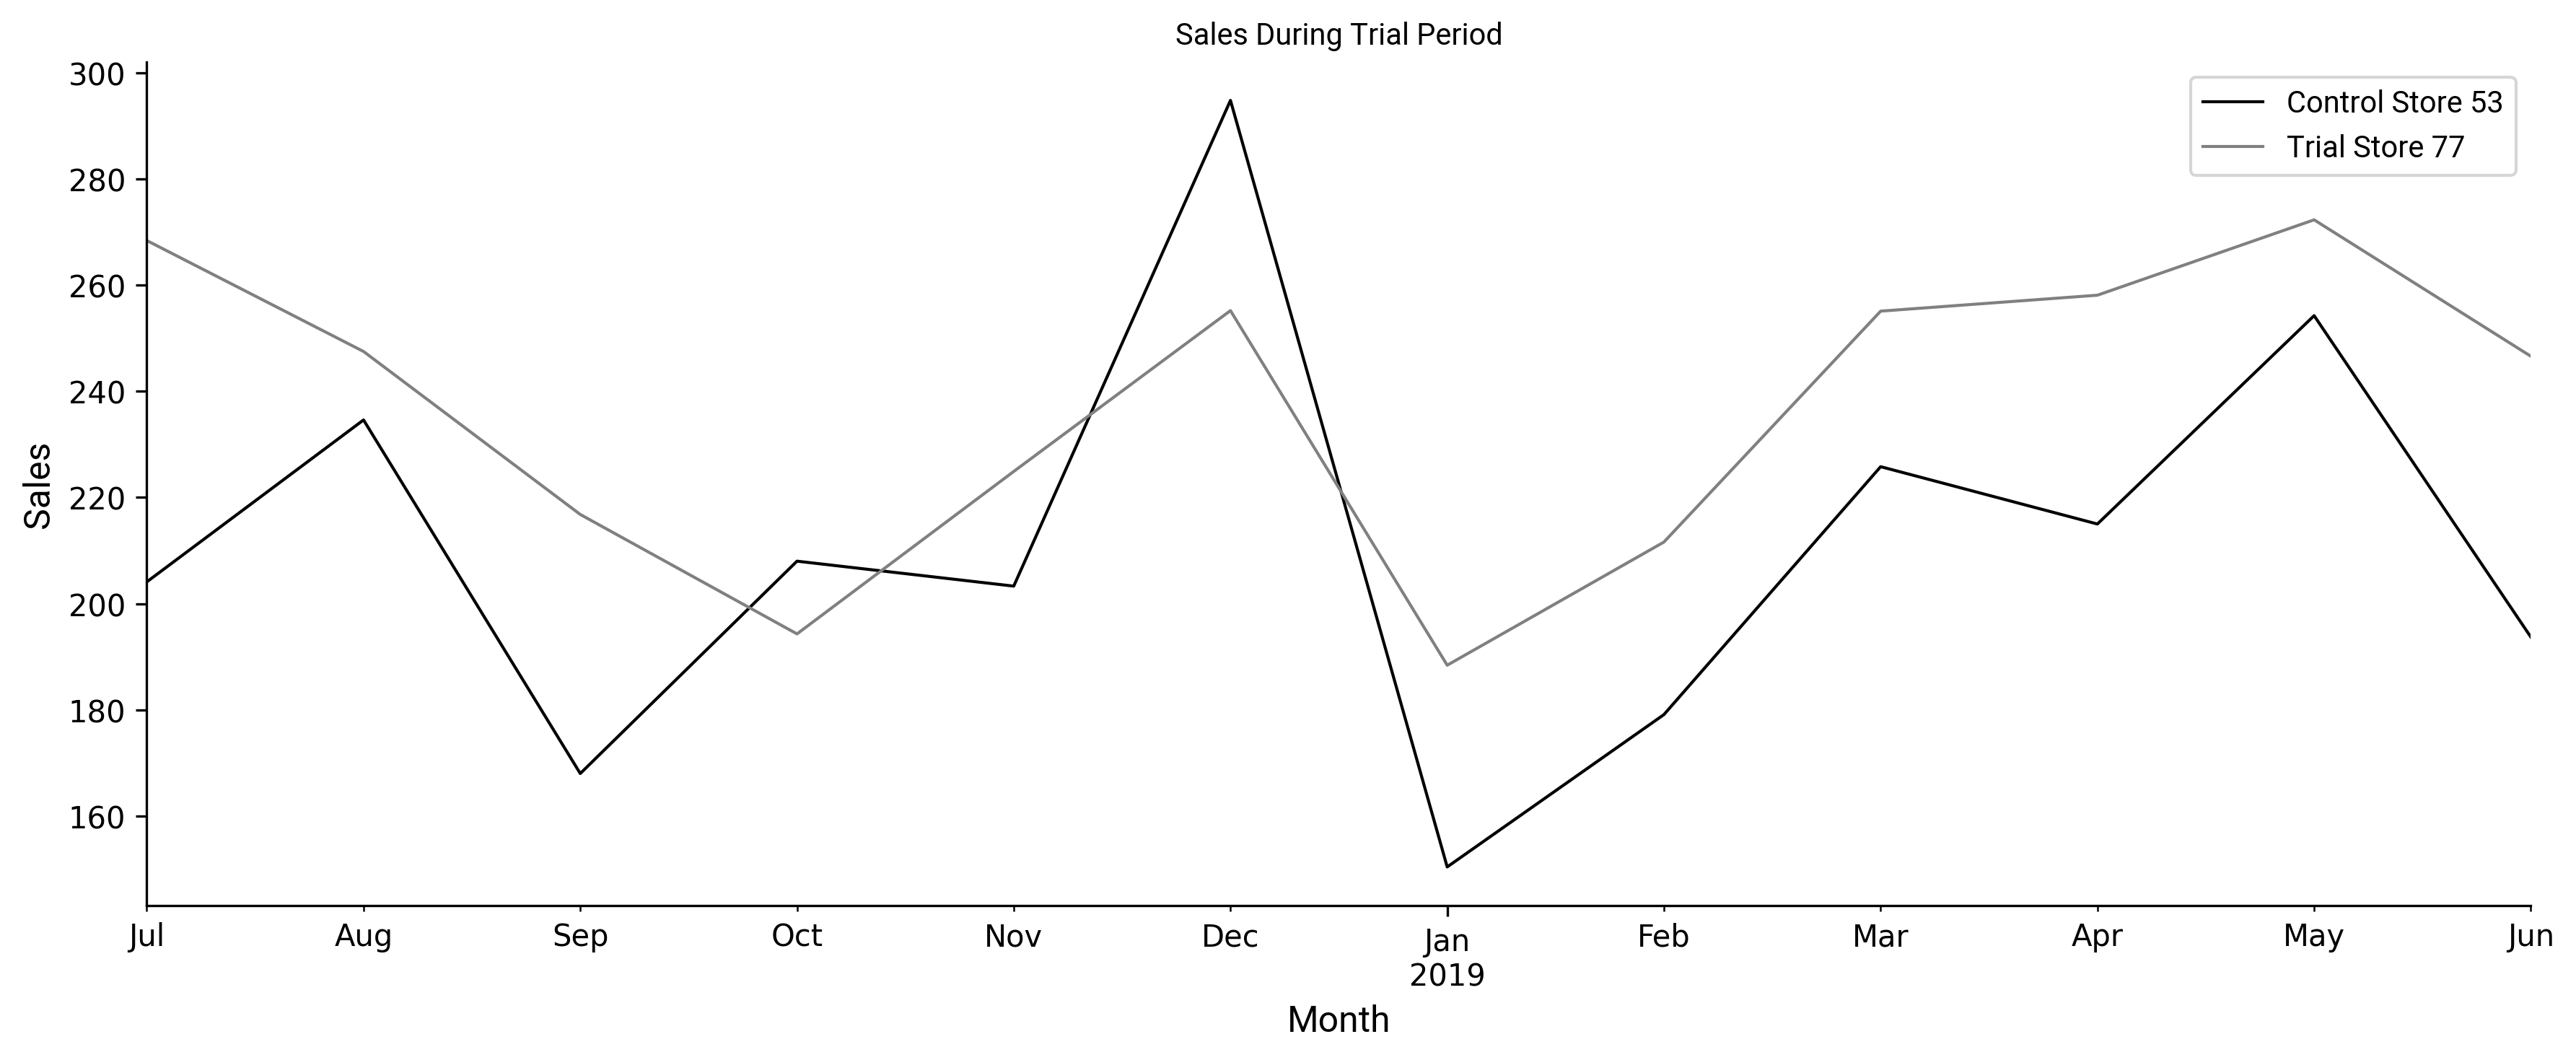

In [31]:
import matplotlib.font_manager as fm

font_path = r'C:\Users\Amiteshwar Singh\Desktop\Roboto-Regular.ttf'
prop = fm.FontProperties(fname=font_path)

grouped77 = trial_store_77.groupby("MONTH")
grouped53 = control_store_53.groupby("MONTH")

plt.figure(figsize=[12, 5], dpi=300)
grouped53["TOT_SALES"].sum().plot(label="Control Store 53", color="black", linestyle="-", linewidth=1)
grouped77["TOT_SALES"].sum().plot(label="Trial Store 77", color="grey", linestyle="-", linewidth=1)
plt.legend(prop=prop)
plt.title("Sales During Trial Period", fontweight='bold', fontsize=16, fontproperties=prop)
plt.xlabel('Month', fontsize=12, fontproperties=prop)
plt.ylabel('Sales', fontsize=12, fontproperties=prop)
plt.tight_layout()
sns.despine()
plt.savefig('77.png')
plt.show()

For the first pair, we can clearly see a difference between the trial store and the control store. Let's examine the next pair of stores.

In [32]:
# 86 & 109
trial_store_86[["TOT_SALES", "PROD_QTY"]].sum()

control_store_109[["TOT_SALES", "PROD_QTY"]].sum()

trial_store_86["LYLTY_CARD_NBR"].value_counts()
trial_store_86[["LYLTY_CARD_NBR"]].count()

repeat_customers_86 = trial_store_86["LYLTY_CARD_NBR"].value_counts()
repeat_customers_86.iloc[:125]

control_store_109["LYLTY_CARD_NBR"].value_counts()
control_store_109[["LYLTY_CARD_NBR"]].count()

repeat_customers_109 = control_store_109["LYLTY_CARD_NBR"].value_counts()
repeat_customers_109.iloc[:115]

grouped86 = trial_store_86.groupby("MONTH")
grouped109 = control_store_109.groupby("MONTH")

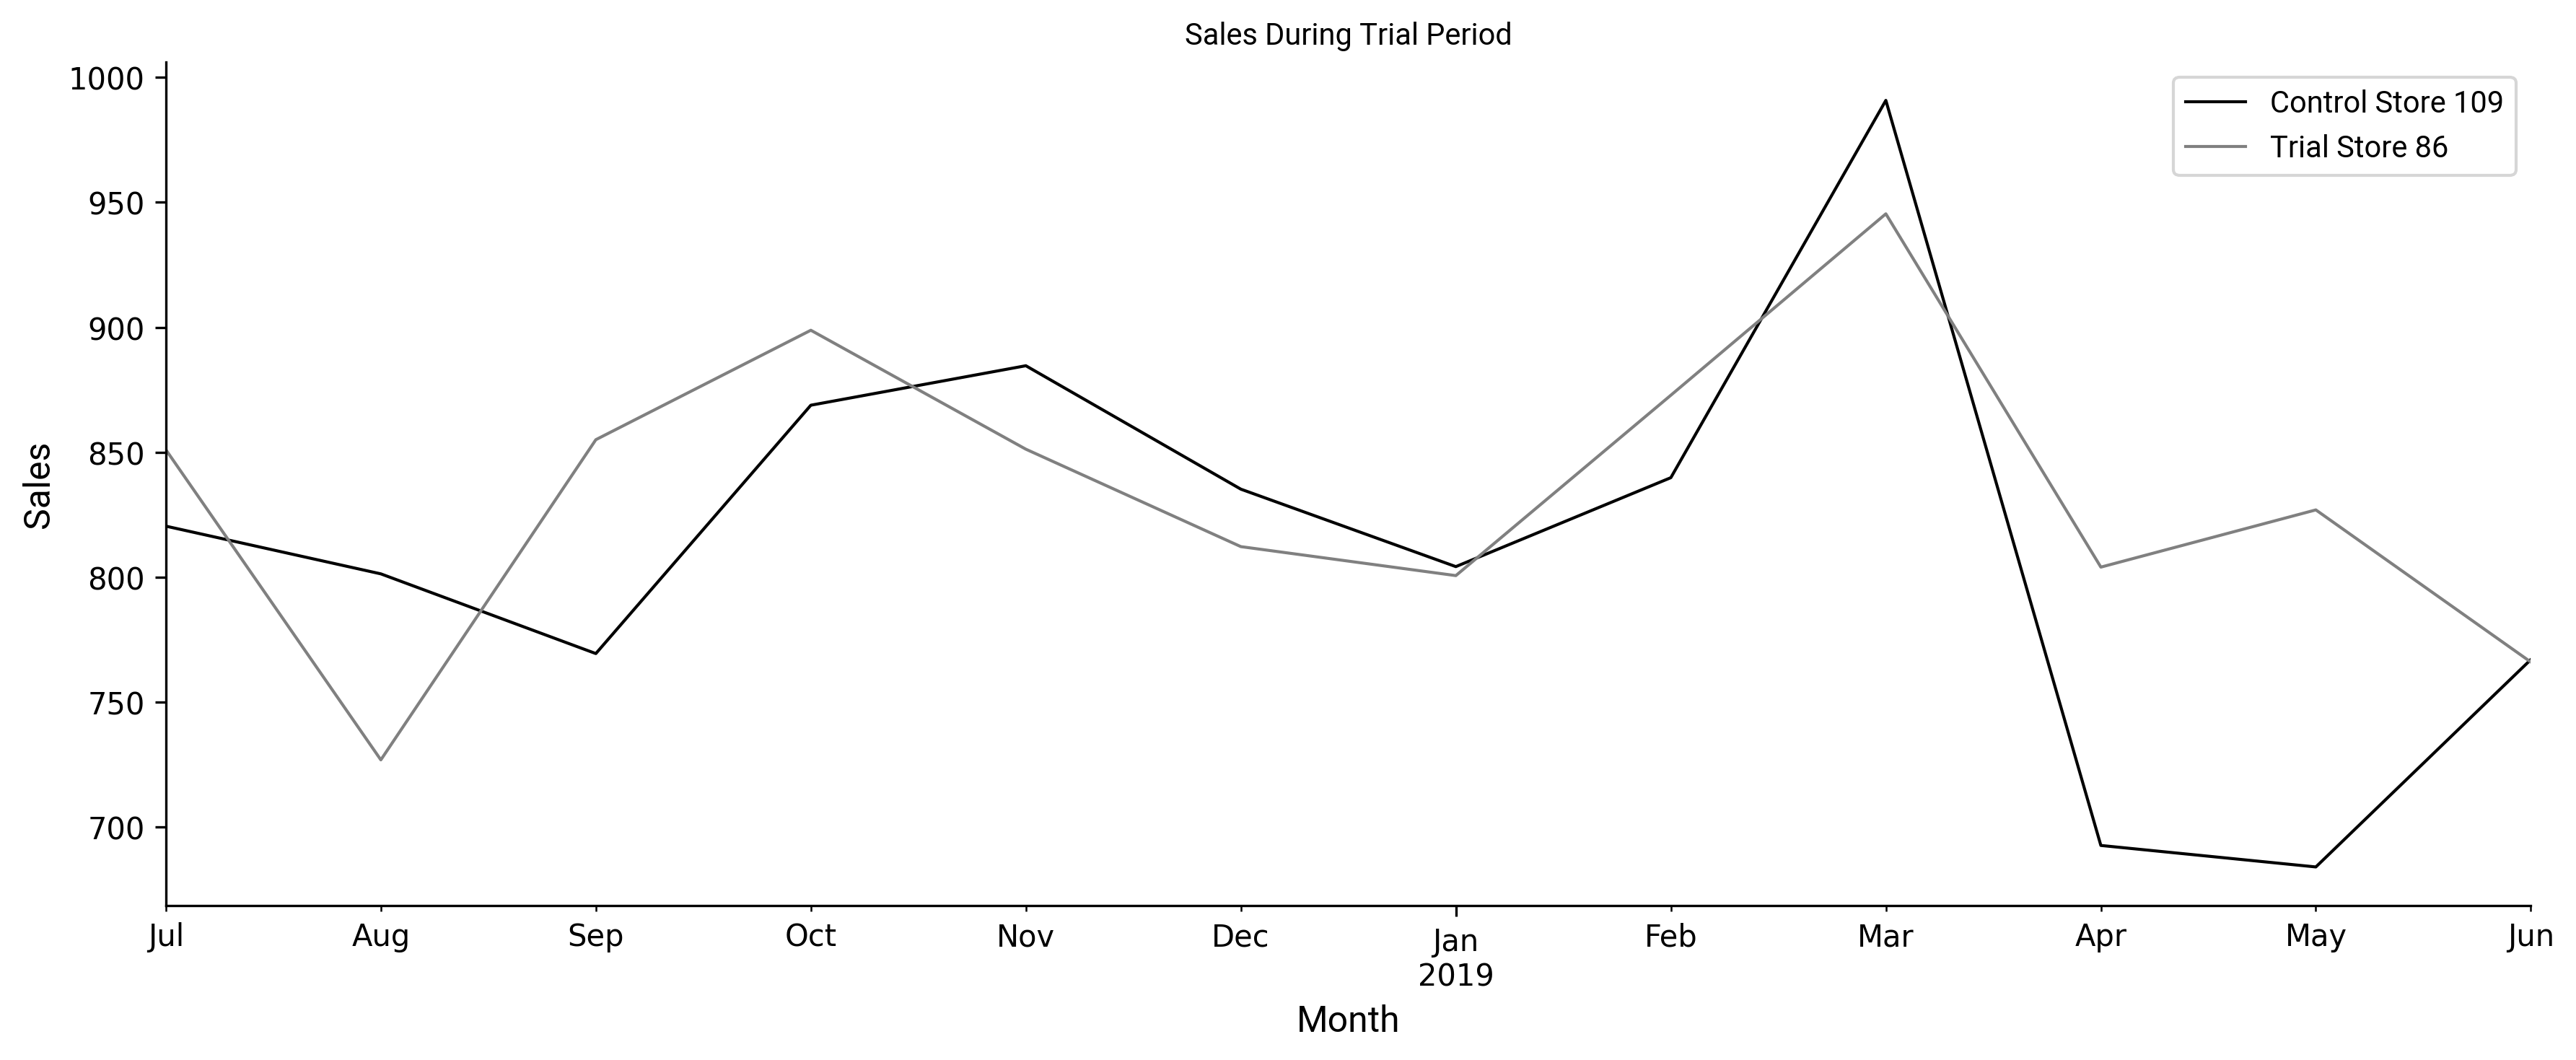

In [33]:
font_path = r'C:\Users\Amiteshwar Singh\Desktop\Roboto-Regular.ttf'
prop = fm.FontProperties(fname=font_path)

plt.figure(figsize=[12, 5], dpi=300)
grouped109["TOT_SALES"].sum().plot(label="Control Store 109", color="black", linestyle="-", linewidth=1)
grouped86["TOT_SALES"].sum().plot(label="Trial Store 86", color="grey", linestyle="-", linewidth=1)
plt.legend(prop=prop)
plt.title("Sales During Trial Period", fontweight='bold', fontsize=16, fontproperties=prop)
plt.xlabel('Month', fontsize=12, fontproperties=prop)
plt.ylabel("Sales", fontsize=12, fontproperties=prop)
plt.tight_layout()
plt.savefig('86.png')
sns.despine()
plt.show()

In [34]:
# 88 & 201
trial_store_88[["TOT_SALES", "PROD_QTY"]].sum()
control_store_201[["TOT_SALES", "PROD_QTY"]].sum()

trial_store_88["LYLTY_CARD_NBR"].value_counts()
trial_store_88[["LYLTY_CARD_NBR"]].count()
repeat_customers_88 = trial_store_88["LYLTY_CARD_NBR"].value_counts()
repeat_customers_88.iloc[:387]

control_store_201["LYLTY_CARD_NBR"].value_counts()
control_store_201[["LYLTY_CARD_NBR"]].count()
repeat_customers_201 = control_store_201["LYLTY_CARD_NBR"].value_counts()
repeat_customers_201.iloc[:374]

grouped88 = trial_store_88.groupby("MONTH")
grouped201 = control_store_201.groupby("MONTH")


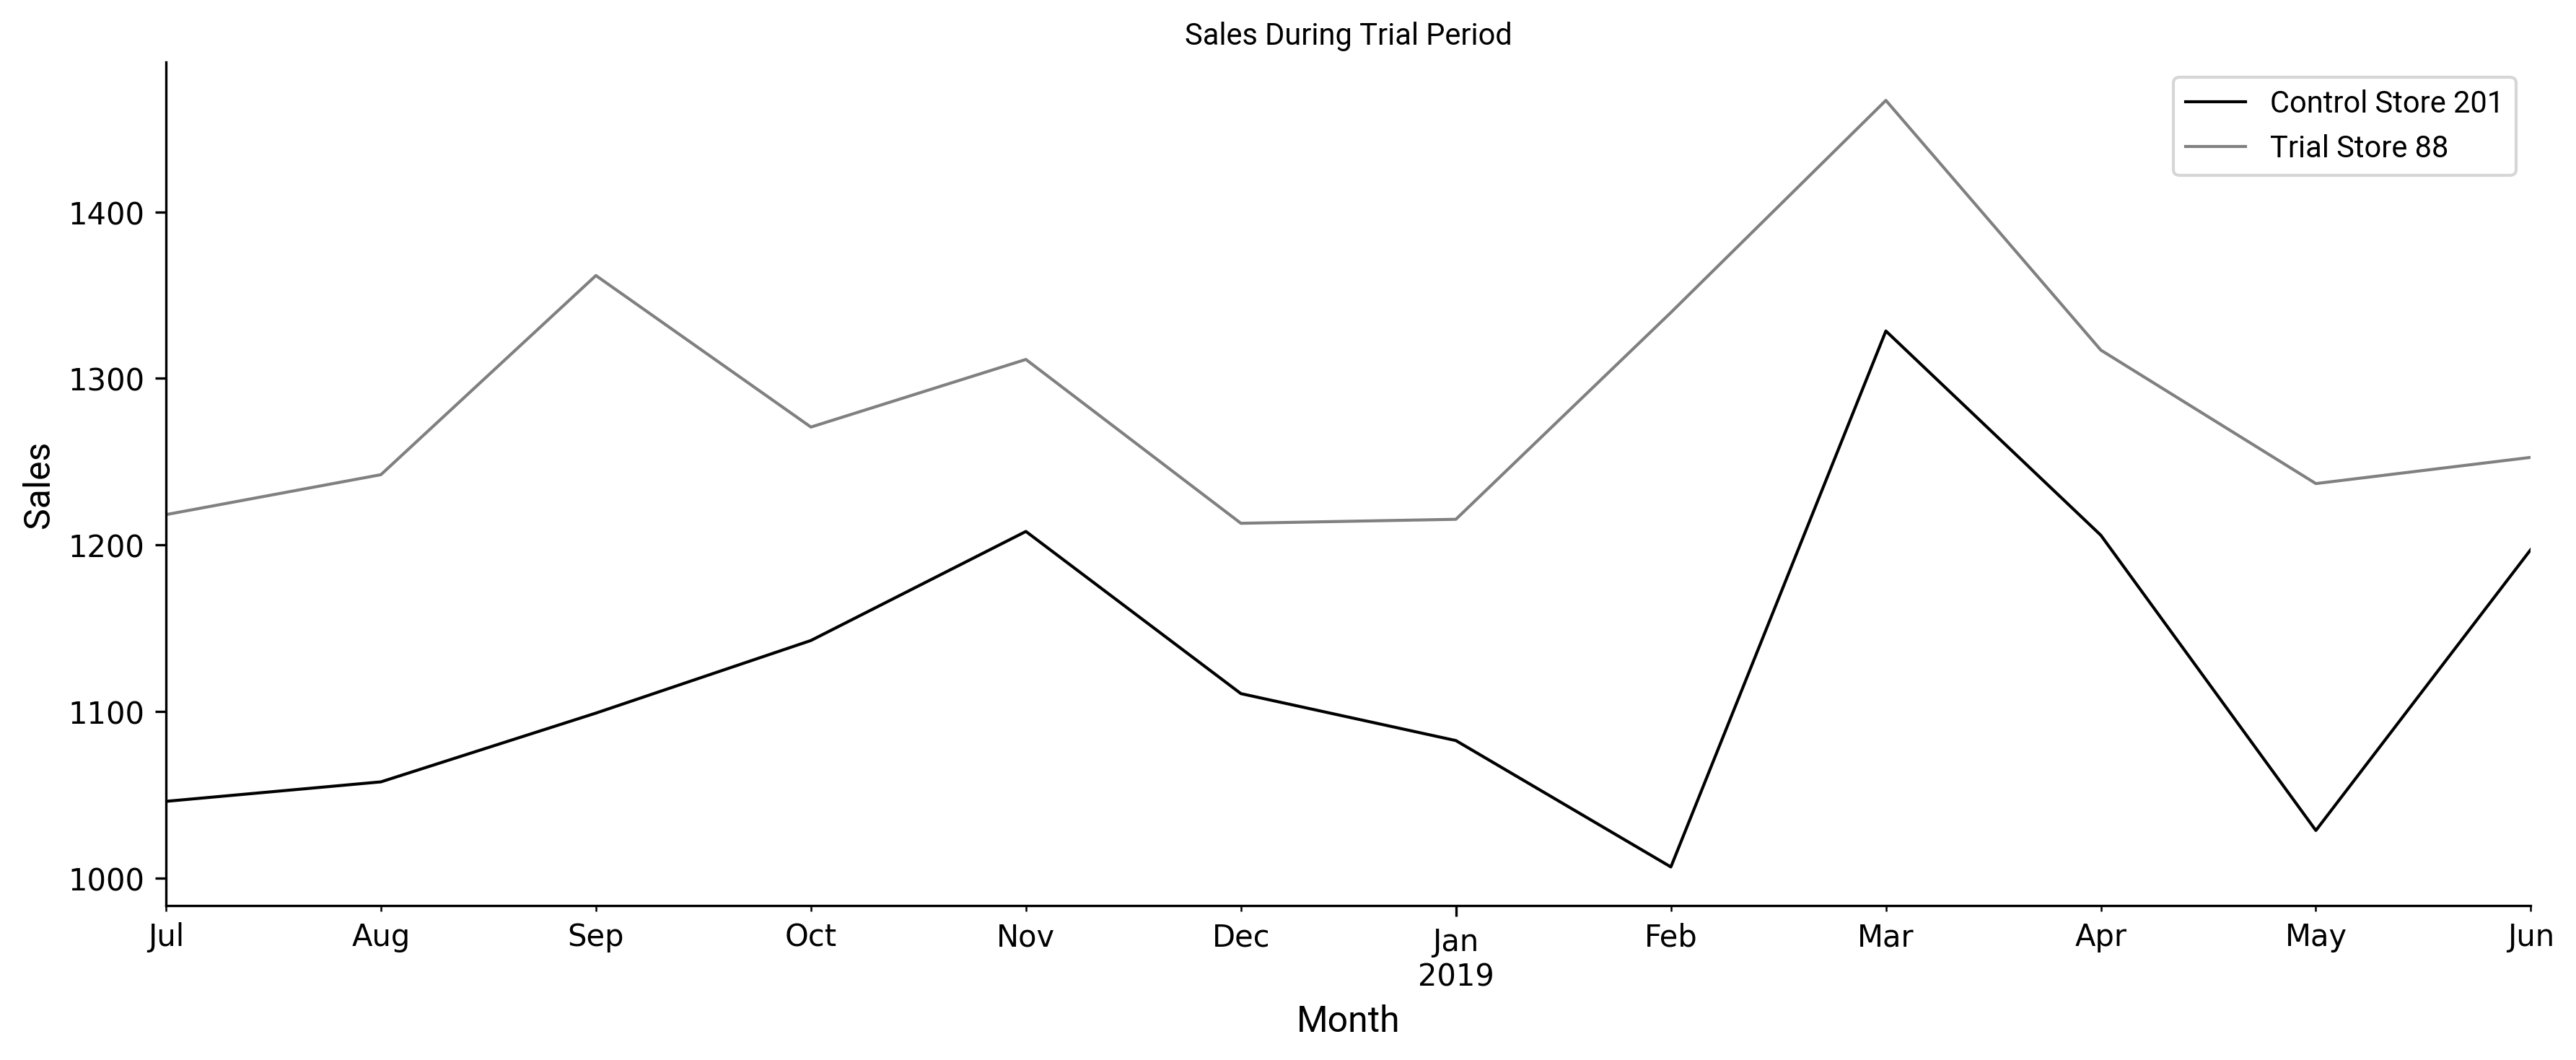

In [35]:
font_path = r'C:\Users\Amiteshwar Singh\Desktop\Roboto-Regular.ttf'
prop = fm.FontProperties(fname=font_path)

plt.figure(figsize=[12, 5], dpi=300)

grouped201["TOT_SALES"].sum().plot(label="Control Store 201", color="black", linestyle="-", linewidth=1)
grouped88["TOT_SALES"].sum().plot(label="Trial Store 88", color="grey", linestyle="-", linewidth=1)

plt.legend(prop=prop)
plt.title("Sales During Trial Period", fontsize=16, fontweight='bold', fontproperties=prop)
plt.ylabel("Sales", fontsize=12, fontproperties=prop)
plt.xlabel('Month', fontsize=12, fontproperties=prop)
plt.tight_layout()
plt.savefig('88.png')
sns.despine()
plt.show()

### Product Quantity Sold

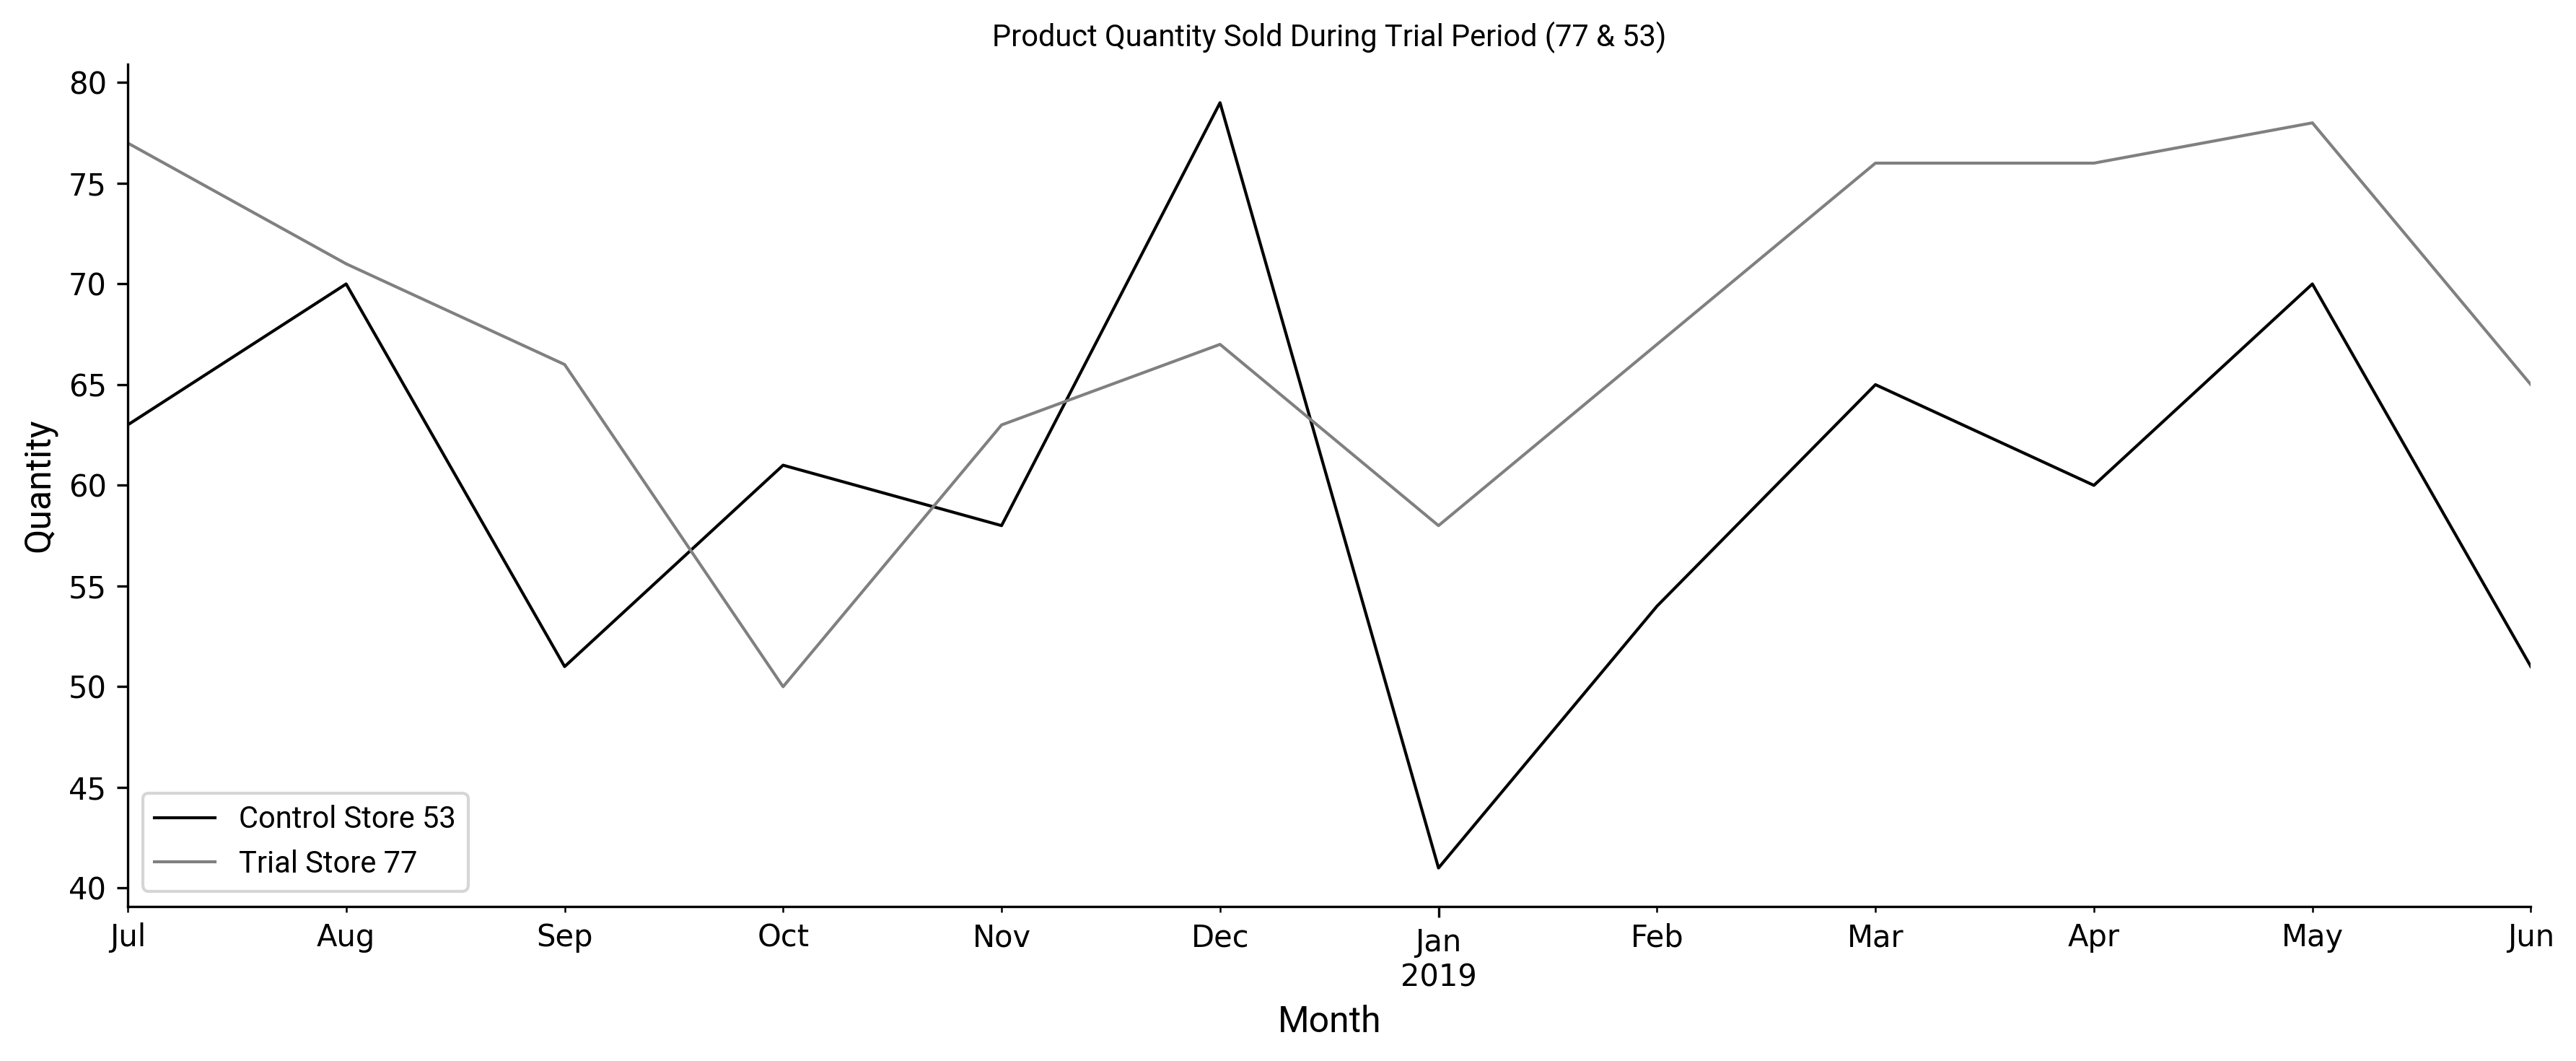

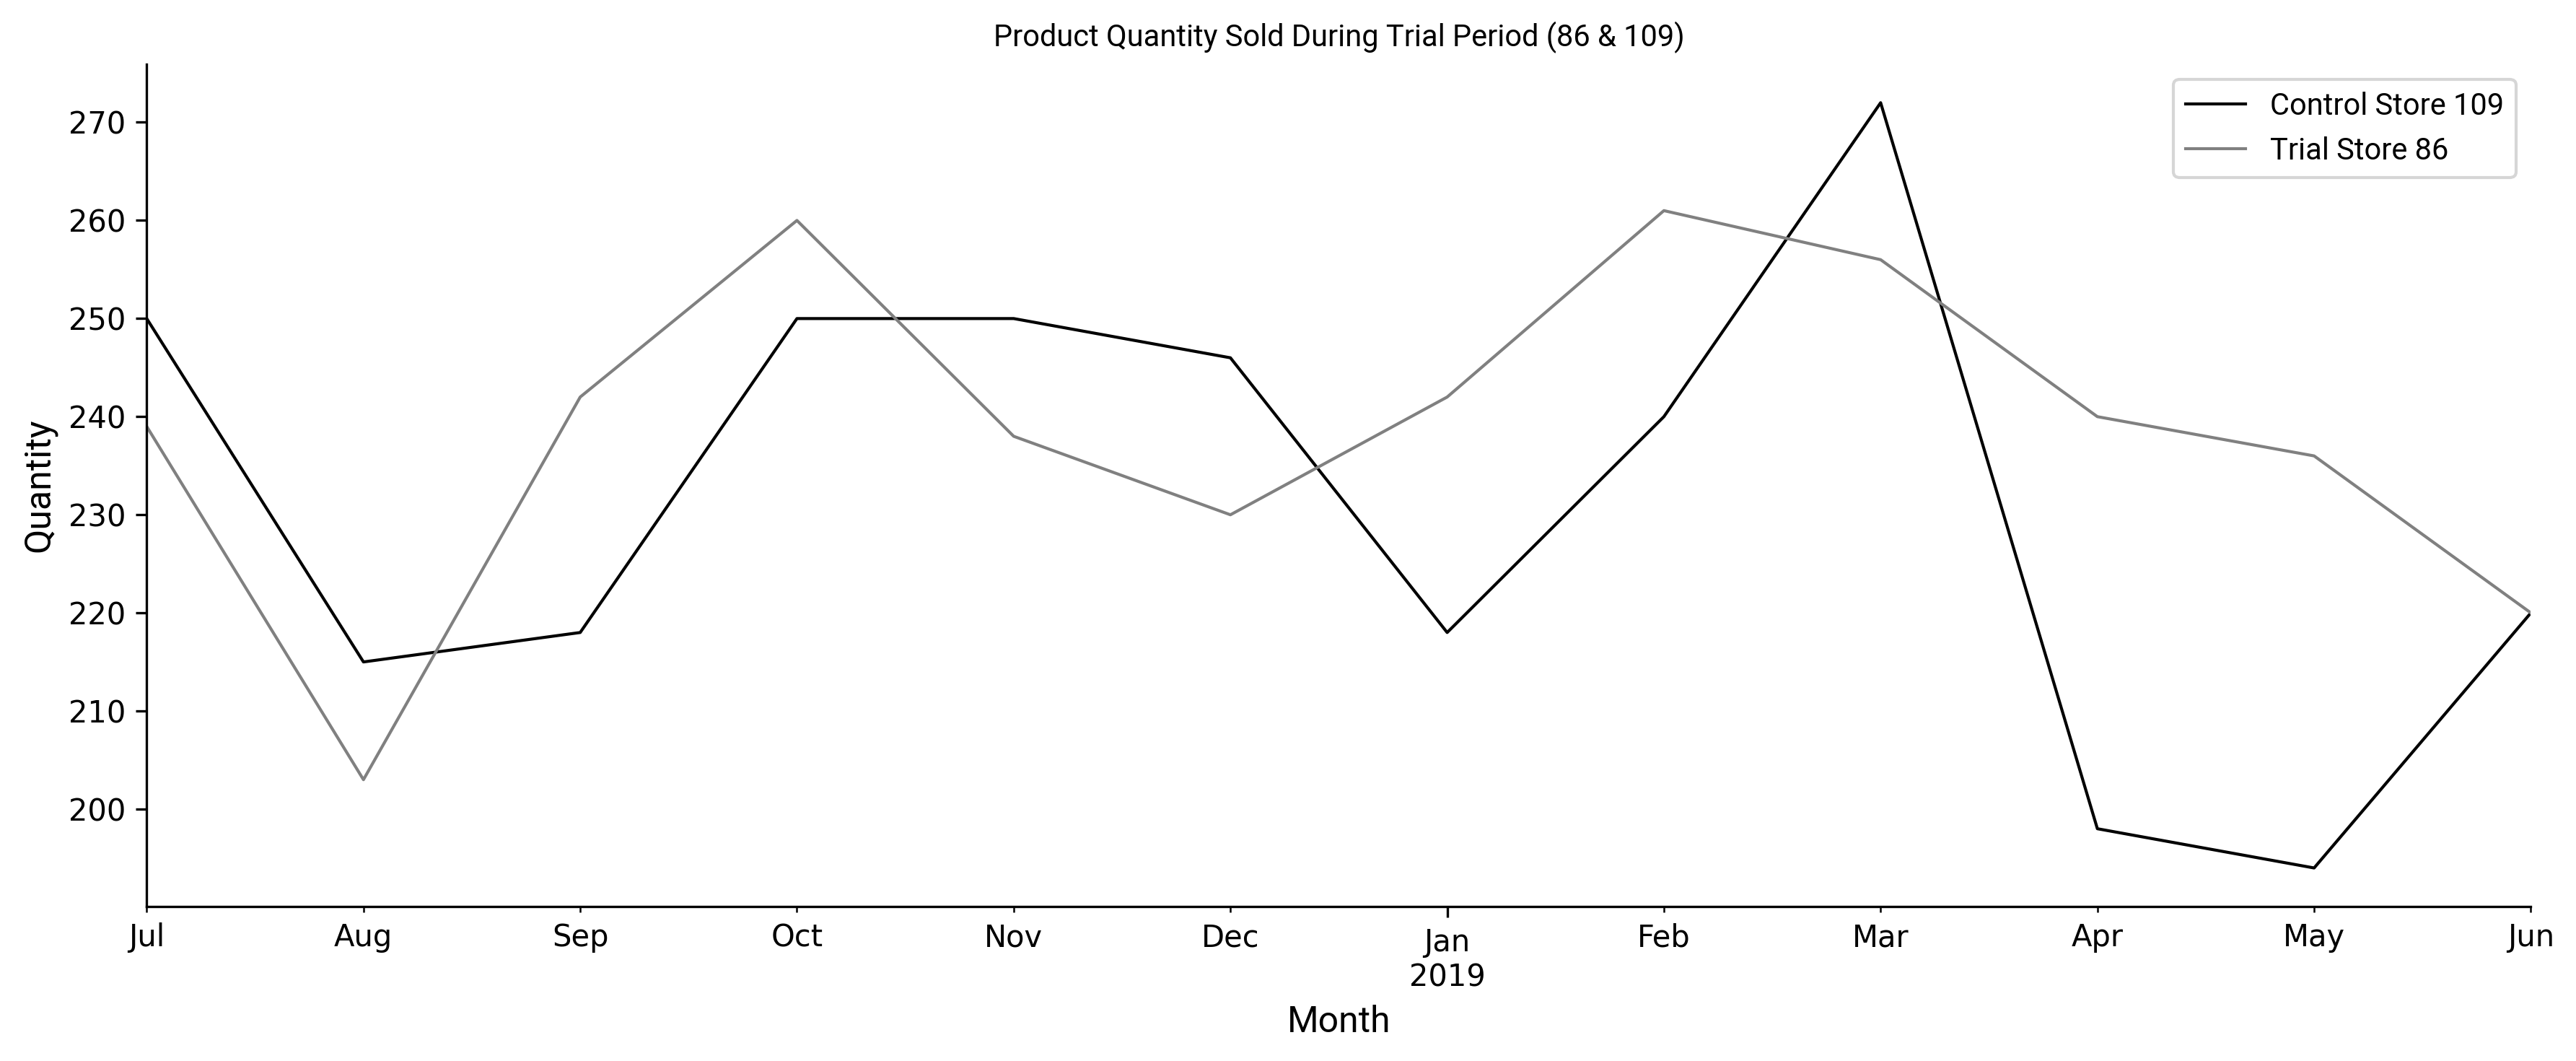

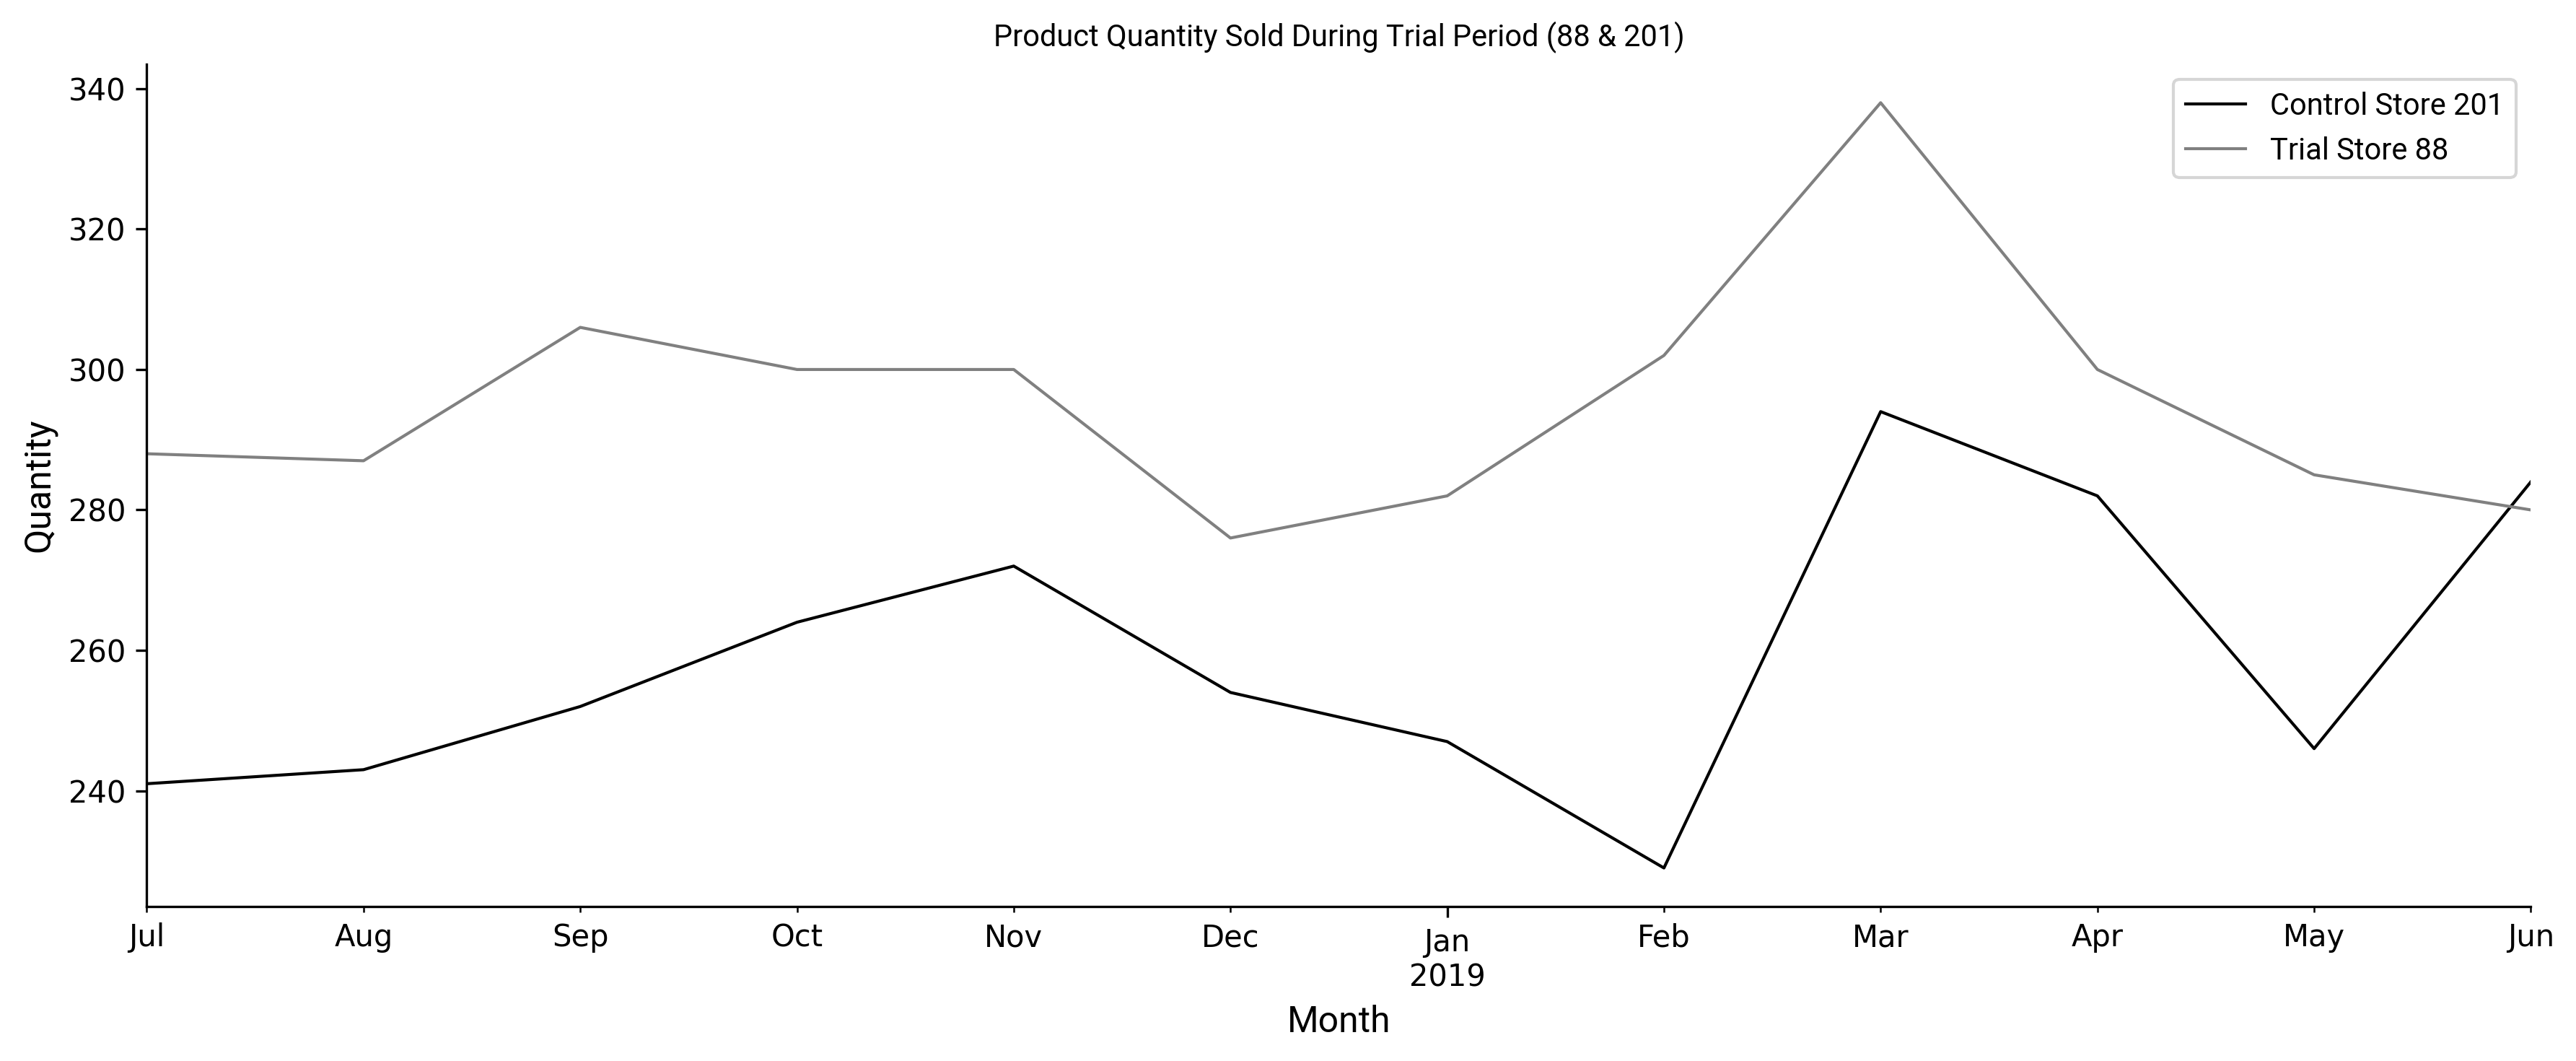

In [36]:
font_path = r'C:\Users\Amiteshwar Singh\Desktop\Roboto-Regular.ttf'
prop = fm.FontProperties(fname=font_path)

# For 77 & 53
plt.figure(figsize=[12, 5], dpi=300)
grouped53["PROD_QTY"].sum().plot(label="Control Store 53", color="black", linestyle="-", linewidth=1)
grouped77["PROD_QTY"].sum().plot(label="Trial Store 77", color="grey", linestyle="-", linewidth=1)
plt.ylabel("Quantity", fontsize=12, fontproperties=prop)
plt.xlabel("Month", fontsize=12, fontproperties=prop)
plt.legend(prop=prop)
plt.title("Product Quantity Sold During Trial Period (77 & 53)", fontsize=16, fontweight='bold', fontproperties=prop)
plt.tight_layout()
sns.despine()
plt.savefig("prod_qty_77_53.png")
plt.show()

# For 86 & 109
plt.figure(figsize=[12, 5], dpi=300)
grouped109["PROD_QTY"].sum().plot(label="Control Store 109", color="black", linestyle="-", linewidth=1)
grouped86["PROD_QTY"].sum().plot(label="Trial Store 86", color="grey", linestyle="-", linewidth=1)
plt.ylabel("Quantity", fontsize=12, fontproperties=prop)
plt.xlabel("Month", fontsize=12, fontproperties=prop)
plt.legend(prop=prop)
plt.title("Product Quantity Sold During Trial Period (86 & 109)", fontsize=16, fontweight='bold', fontproperties=prop)
plt.tight_layout()
sns.despine()
plt.savefig("prod_qty_86_109.png")
plt.show()

# For 88 & 201
plt.figure(figsize=[12, 5], dpi=300)
grouped201["PROD_QTY"].sum().plot(label="Control Store 201", color="black", linestyle="-", linewidth=1)
grouped88["PROD_QTY"].sum().plot(label="Trial Store 88", color="grey", linestyle="-", linewidth=1)
plt.ylabel("Quantity", fontsize=12, fontproperties=prop)
plt.xlabel("Month", fontsize=12, fontproperties=prop)
plt.legend(prop=prop)
plt.title("Product Quantity Sold During Trial Period (88 & 201)", fontsize=16, fontweight='bold', fontproperties=prop)
plt.tight_layout()
sns.despine()
plt.savefig("prod_qty_88_201.png")
plt.show()

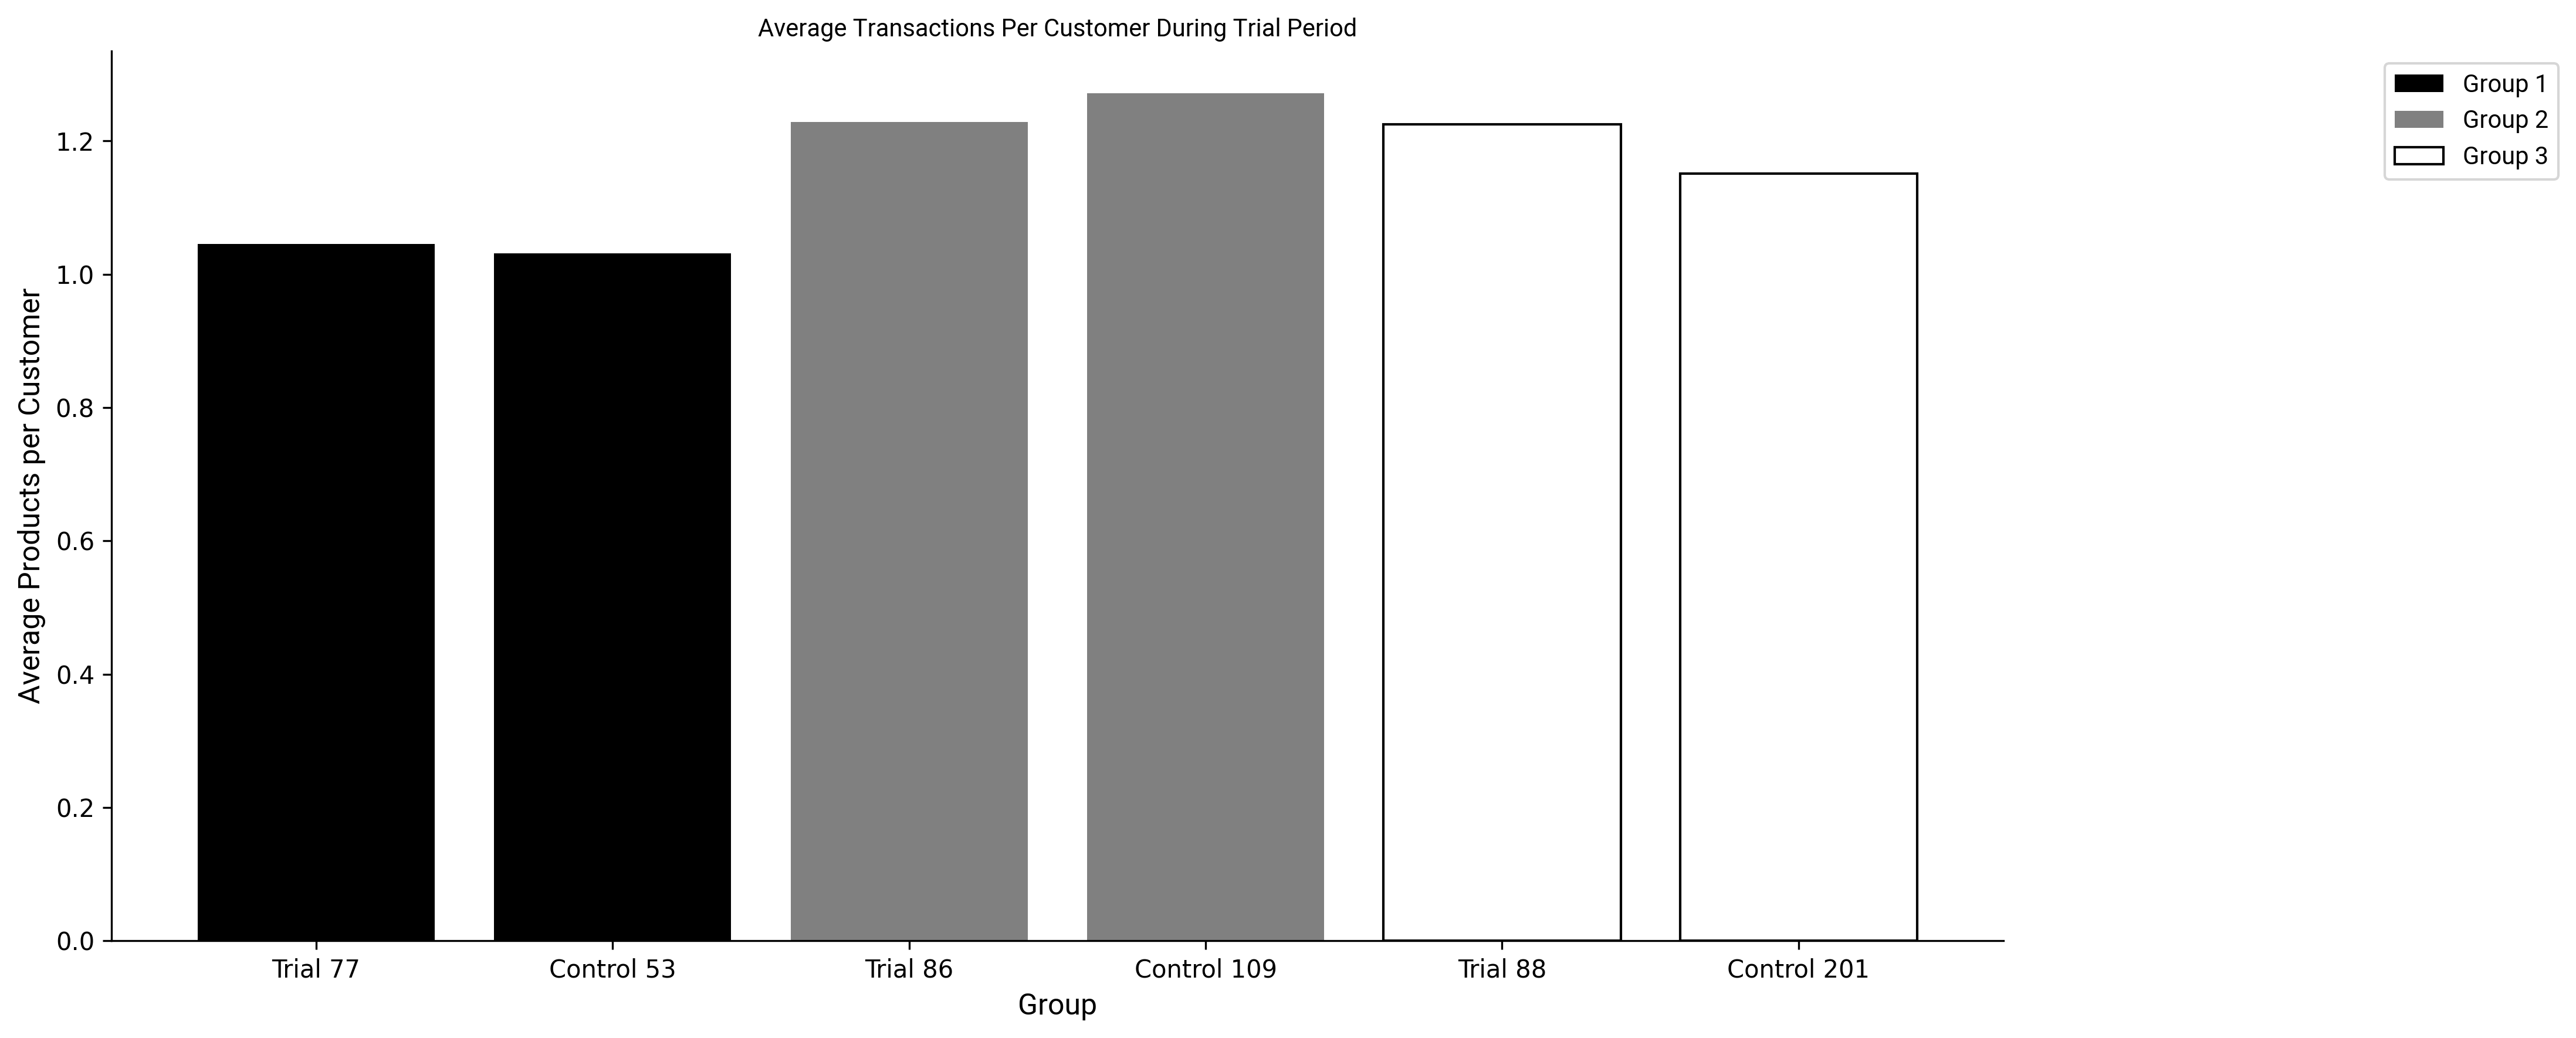

In [37]:
# Data for average transactions per customer for each group
group_names = ["Trial 77", "Control 53", "Trial 86", "Control 109", "Trial 88", "Control 201"]
values = [
    grouped77["LYLTY_CARD_NBR"].value_counts().mean(),
    grouped53["LYLTY_CARD_NBR"].value_counts().mean(),
    grouped86["LYLTY_CARD_NBR"].value_counts().mean(),
    grouped109["LYLTY_CARD_NBR"].value_counts().mean(),
    grouped88["LYLTY_CARD_NBR"].value_counts().mean(),
    grouped201["LYLTY_CARD_NBR"].value_counts().mean()
]

# Split into groups for better visualization
group1 = ["Trial 77", "Control 53"]
group2 = ["Trial 86", "Control 109"]
group3 = ["Trial 88", "Control 201"]
values_grp_1 = values[:2]
values_grp_2 = values[2:4]
values_grp_3 = values[4:]

# Plotting the results
font_path = r'C:\Users\Amiteshwar Singh\Desktop\Roboto-Regular.ttf'
prop = fm.FontProperties(fname=font_path)

plt.figure(figsize=[15, 6], dpi=300)

plt.bar(group1, values_grp_1, label="Group 1", color="black")
plt.bar(group2, values_grp_2, label="Group 2", color="grey")
plt.bar(group3, values_grp_3, label="Group 3", color="white", edgecolor="black")

plt.ylabel("Average Products per Customer", fontsize=12, fontproperties=prop)
plt.xlabel("Group", fontsize=12, fontproperties=prop)
plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1), prop=prop)
plt.title("Average Transactions Per Customer During Trial Period", fontsize=16, fontweight='bold', fontproperties=prop)

plt.tight_layout()
sns.despine()
plt.savefig("average_transactions_per_customer.png")
plt.show()

The trial stores showed higher average transactions, indicating the new layout may be boosting sales. They outperformed control stores in sales, products sold, repeat customers, and average transactions. I recommend expanding the trial stores and re-evaluating in three months to confirm sustained growth.